In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss
from sklearn.mixture import GaussianMixture
import pandas as pd

In [2]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

In [3]:
def PlotGMM(X,iteration_data,plotper_iter:int,thresholds,title_name:str,ylimit,mean_ghost,var_ghost):
    c=['red','green','blue','magenta','darkorange','slategray']
    gmm_datapoints=np.linspace(0,np.max(X),100)
    for i in range(len(iteration_data)):
        if  i % 1 == 0 or i==len(iteration_data)-1:
            print("Iteration {}".format(i))
            # or i==len(iteration_data)-1
            # i%plotper_iter==0
            #Set figure size, title, and plot the data points
            plt.figure(figsize=(8,5))
            plt.title(title_name)
            # plt.scatter(X, [0.005] * len(X), color='mediumslateblue', s=15, marker="|", label="Data points")
            plt.hist(X,bins=75,density=True)

            
            #Plot the estimated pdf
            for k in range(len(iteration_data[i])):
                plt.plot(gmm_datapoints,(gauss.GaussianPDF(gmm_datapoints, iteration_data[i][k]['Mean'], iteration_data[i][k]['Variance'])), color=c[k], label="Distribution {}".format(k+1))
            
            if ylimit==[]:
                pass
            else:
                plt.ylim(0,ylimit)
                
            #Set the x and y label
            plt.xlabel("{}/KIR3DL3 Ratio".format(title_name))
            plt.ylabel("Density")
            
            
            if i==len(iteration_data)-1:
        
                for i in range (len(thresholds)):
                    if i==0:
                        label_name="Thresholds"
                    else:
                        label_name=None
                    plt.axvline(thresholds[i],c='red',ls='--',lw=0.5,label=label_name)
            
            # Plot ghost gaussian
            if mean_ghost==[]:
                pass
            else:
                gmm_datapoints2 = np.linspace(0,np.max(X),100)
                for i in range(len(mean_ghost)):
                    plt.plot(gmm_datapoints2,gauss.GaussianPDF(gmm_datapoints2, mean_ghost[i], var_ghost[i]), color='black', linestyle='dashed', label="Possible missing distribution")
            
            
            plt.legend(loc="upper right")
            output_path= "/Users/devitahalim/Documents/GitHub/scie30001-project/output/for_slides/plot_"
            plt.savefig("img_{0:02d}".format(i), bbox_inches='tight')

            

# Things for slides

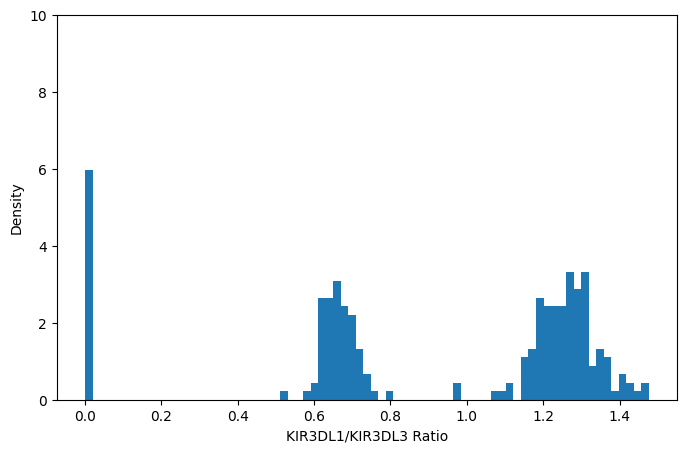

In [4]:
KIR3DL1=B['KIR3DL1'].to_numpy()


plt.figure(figsize=(8,5))
plt.hist(KIR3DL1,bins=75,density=True,)
plt.xlabel('KIR3DL1/KIR3DL3 Ratio')
plt.ylabel('Density')
plt.ylim(0,10)
plt.show()


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4


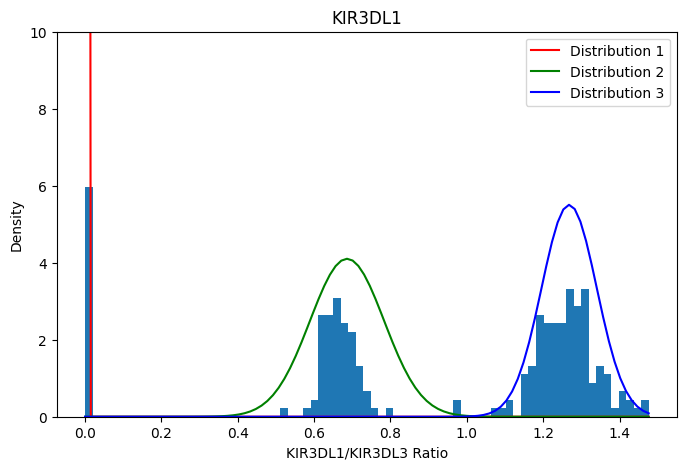

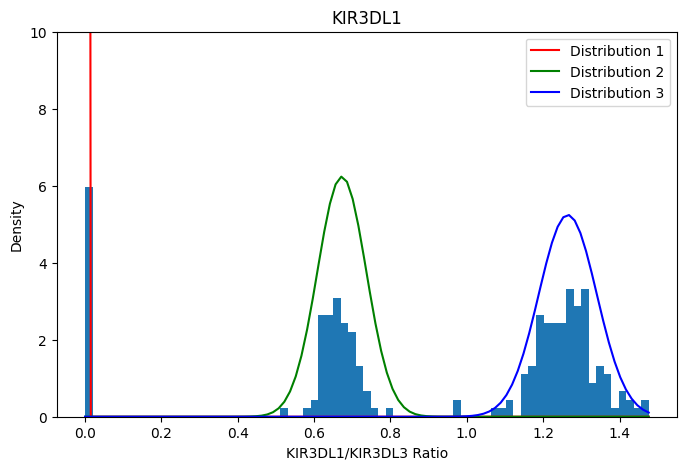

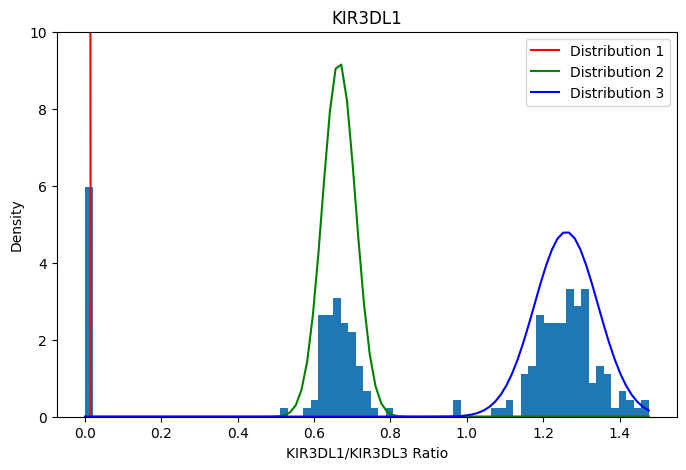

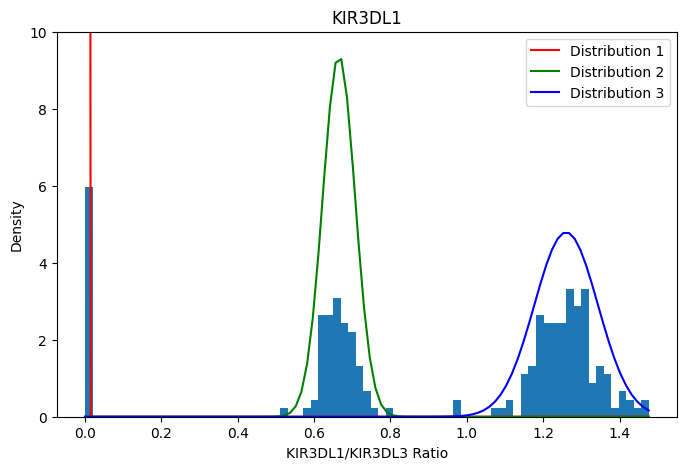

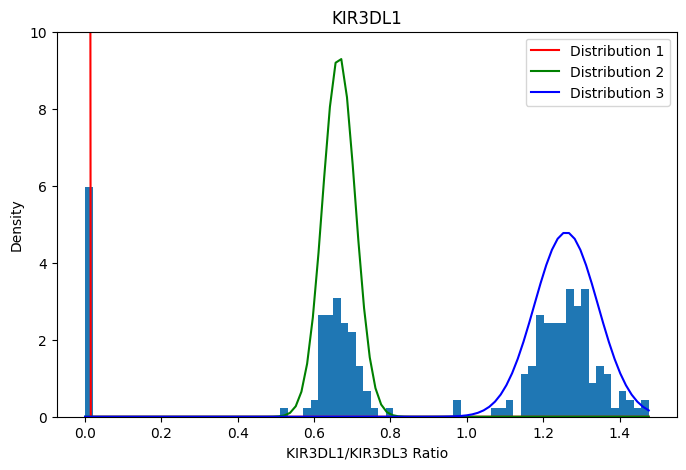

In [5]:
em_KIR3DL1,pxj_KIR3DL1=gauss.EMGMM_varconstraint(KIR3DL1,3,[])

PlotGMM(KIR3DL1,em_KIR3DL1,10,[],'KIR3DL1',10,[],[])

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4


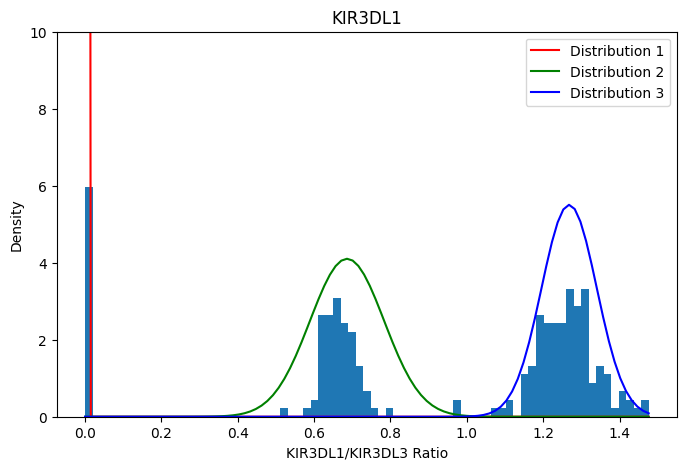

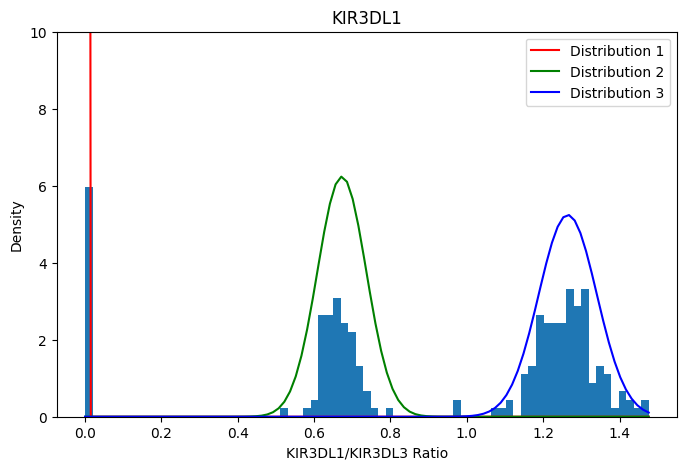

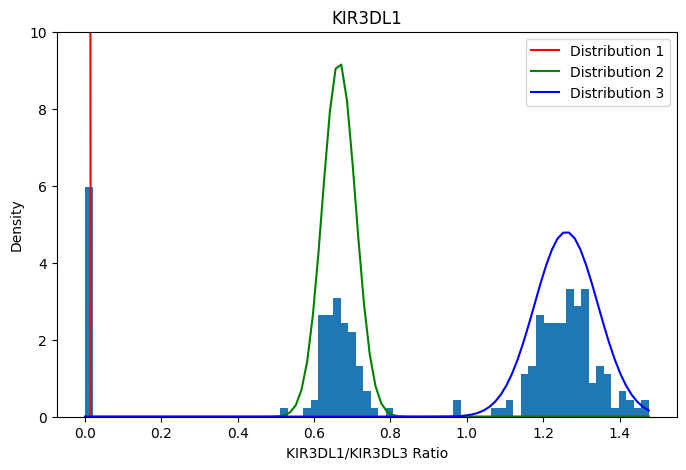

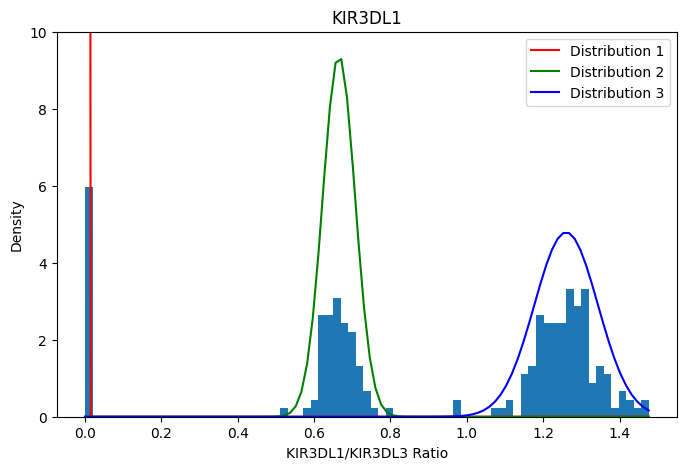

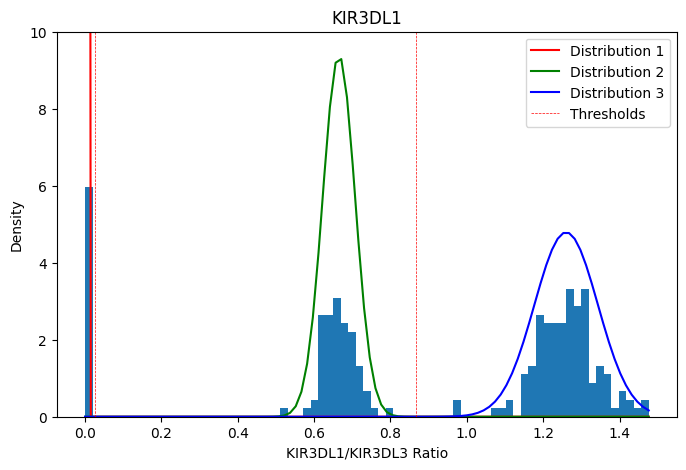

In [6]:
t_KIR3DL1=gauss.findThreshold2(em_KIR3DL1)
PlotGMM(KIR3DL1,em_KIR3DL1,10,t_KIR3DL1,'KIR3DL1',10,[],[])

In [8]:
t_KIR3DL1

[0.02649180055239727, 0.866671490648511]

### Show variance constraint is important

In [61]:
def PlotGMM(X,iteration_data,plotper_iter:int,thresholds,manual_thres,title_name:str,ylimit,mean_ghost,var_ghost):
    c=['red','green','blue','magenta','darkorange','slategray']
    gmm_datapoints=np.linspace(0,(np.max(X)+0.1),100)
    for i in range(len(iteration_data)):
        if  i==len(iteration_data)-1:
            # i%plotper_iter==0
            #Set figure size, title, and plot the data points
            fig=plt.figure(figsize=(8,5))
            plt.title(title_name)
            # plt.scatter(X, [0.05] * len(X), color='mediumslateblue', s=15, marker="|", label="Data points")
            plt.hist(X,bins=125,density=True)

            
            #Plot the estimated pdf
            for k in range(len(iteration_data[i])):
                plt.plot(gmm_datapoints,gauss.GaussianPDF(gmm_datapoints, iteration_data[i][k]['Mean'], iteration_data[i][k]['Variance']), color=c[k], label="Distribution {}".format(k+1))
            
            if ylimit==[]:
                pass
            else:
                plt.ylim(0,ylimit)
                
            #Set the x and y label
            plt.xlabel("{}/KIR3DL3 Ratio".format(title_name))
            plt.ylabel("Density")
            
            

        
            # for i in range (len(thresholds)):
            #     if i==0:
            #         label_name="Thresholds"
            #     else:
            #         label_name=None
            #     plt.axvline(thresholds[i],c='red',ls='--',lw=0.9,label=label_name)
                
            for i in range(len(manual_thres)):
                if i==0:
                    label_name="Manual thresholds"
                else:
                    label_name=None
                plt.axvline(manual_thres[i],c='blue',ls='--',lw=0.9,label=label_name)

            # Plot ghost gaussian
            if mean_ghost==[]:
                pass
            else:
                gmm_datapoints2 = np.linspace(0,np.max(X),100)
                for i in range(len(mean_ghost)):
                    plt.plot(gmm_datapoints2,gauss.GaussianPDF(gmm_datapoints2, mean_ghost[i], var_ghost[i]), color='black', linestyle='dashed', label="Possible missing distribution")
            
            
            plt.legend(loc="upper left")
            

In [9]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')
a=list(B)
KIR=a[1:]
KIR.remove("KIR3DL3")
sample_n=B.iloc[:,0].to_numpy()

threshold_all=list()
data_lowprob_all=list()
for i in KIR:
    X=B["{}".format(i)].to_numpy()
    
    def main(X):

        n_components=gauss.BIC_gmm(X)
        low_prob_proportion=len(X)
        while n_components<6:
            em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
            low_prob_proportion,data_lowprob=gauss.check_prob2(pxj,em)
            if low_prob_proportion>=(0.03*len(X)):
                n_components=n_components+1
            elif gauss.check_mean_dis(em)==False:
                n_components=n_components-1
            else:
                break
        return(em,pxj)
    
    em_,pxj=main(X)
    
    # Thresholds
    thresholds=gauss.findThreshold1(X,em_)

    mean_ghost=[]
    var_ghost=[]
    # Check threshold of 0 copies
    if gauss.check_gaps_below(em_)==(False,0):
        mean_ghost.append(1e-4)
        var_ghost.append(1e-6)
        thresholds.append(0.07277145626097836)
    elif gauss.check_gaps_below(em_)==(False,1):
        last_iter=em_[-1]
        mean_ghost.append(1e-4)
        var_ghost.append(1e-6)
        thresholds.append(0.07277145626097836)
        
        new_thres=last_iter[0]['Mean']-(3.89*np.sqrt(last_iter[0]['Variance']))
        mean_ghost.append((min(thresholds)+new_thres)/2)
        var_ghost.append((last_iter[0]['Variance']))
        thresholds.append(new_thres)   

    # Check if there is "double gap", add threshold if yes.
    if gauss.check_gaps_means(em_)[0]==True:
        gauss_index=gauss.check_gaps_means(em_)[1]
        last_iter=em_[-1]
        extra_threshold_1=last_iter[gauss_index]['Mean']+(3.89*np.sqrt(last_iter[gauss_index]['Variance']))
        dis_thres=extra_threshold_1-thresholds[-1]
        extra_threshold_2=last_iter[gauss_index+1]['Mean']-(3.89*np.sqrt(last_iter[gauss_index+1]['Variance']))
        thresholds=thresholds[:-1]

        mean_ghost.append((extra_threshold_1+extra_threshold_2)/2)
        var_ghost.append(((extra_threshold_2-extra_threshold_1)/6.58)**2)

        thresholds.append(extra_threshold_1)
        thresholds.append(extra_threshold_2)
    thresholds.sort()

    threshold_all.append(thresholds)

    # Sample numbers with low probability
    prop_lowprob,data_lowprob=gauss.check_prob2(pxj,em_)
    lowprob_sample_number=list()
    for k in data_lowprob:
        lowprob_sample_number.append(sample_n[k])
        
    data_lowprob_all.append(lowprob_sample_number)
    #Output the figures
    # fig=PlotGMM(X,em_,50,thresholds,i,7,mean_ghost,var_ghost)

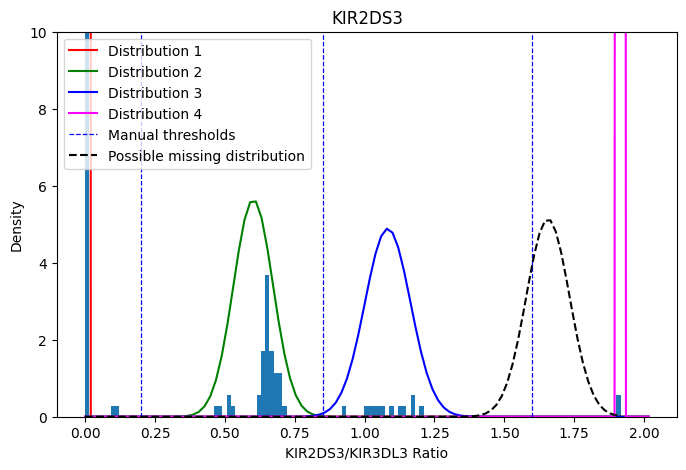

In [64]:
kir2ds3=B['KIR2DS3'].to_numpy()
em_2ds3,pxj_2ds3=gauss.EMGMM_varconstraint(kir2ds3,4,[])
t_2ds3=gauss.findThreshold2(em_2ds3)
if gauss.check_gaps_means(em_2ds3)[0]==True:
    gauss_index=gauss.check_gaps_means(em_2ds3)[1]
    last_iter=em_2ds3[-1]
    extra_threshold_1=last_iter[gauss_index]['Mean']+(3.89*np.sqrt(last_iter[gauss_index]['Variance']))
    dis_thres=extra_threshold_1-t_2ds3[-1]
    extra_threshold_2=last_iter[gauss_index+1]['Mean']-(3.89*np.sqrt(last_iter[gauss_index+1]['Variance']))
    t_2ds3=t_2ds3[:-1]

    mean_ghost.append((extra_threshold_1+extra_threshold_2)/2)
    var_ghost.append(((extra_threshold_2-extra_threshold_1)/6.58)**2)

    t_2ds3.append(extra_threshold_1)
    t_2ds3.append(extra_threshold_2)
t_2ds3.sort()

man_2ds3=[0.2,0.85,1.6]

PlotGMM(kir2ds3,em_2ds3,10,t_2ds3,man_2ds3,'KIR2DS3',10,[1.6557780556576895],[0.006033877836378221])

### KIR2DL3

In [4]:
KIR2DL3_data=B['KIR2DL3'].to_numpy()

X=KIR2DL3_data

em,t=EMGMM(X,[])
em2,t2=EMGMM2(X,[])

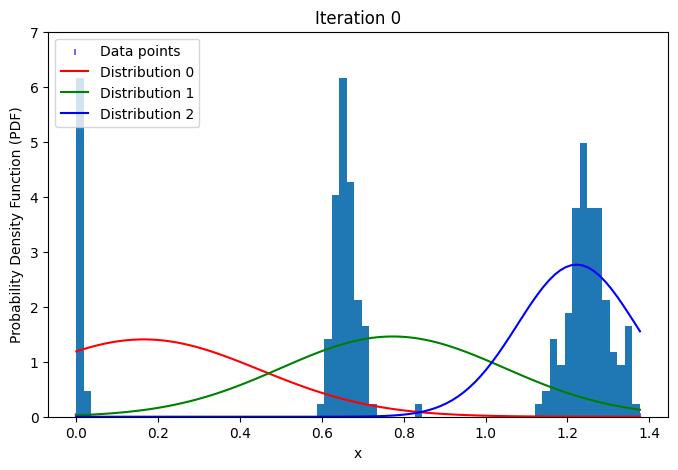

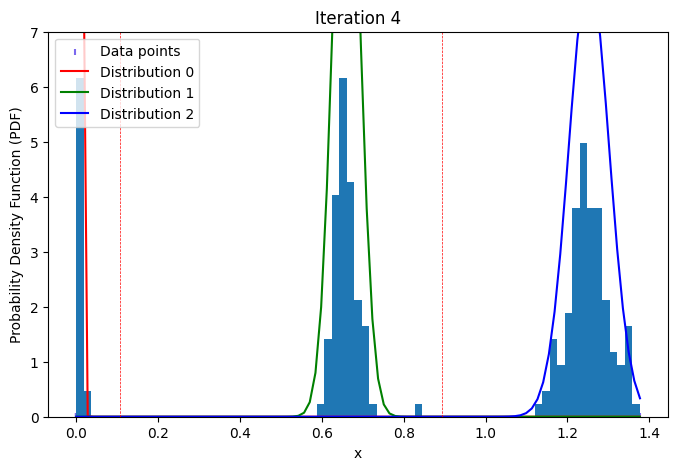

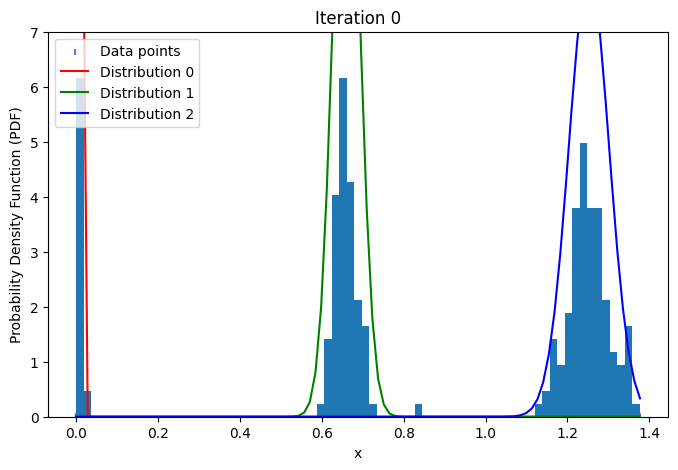

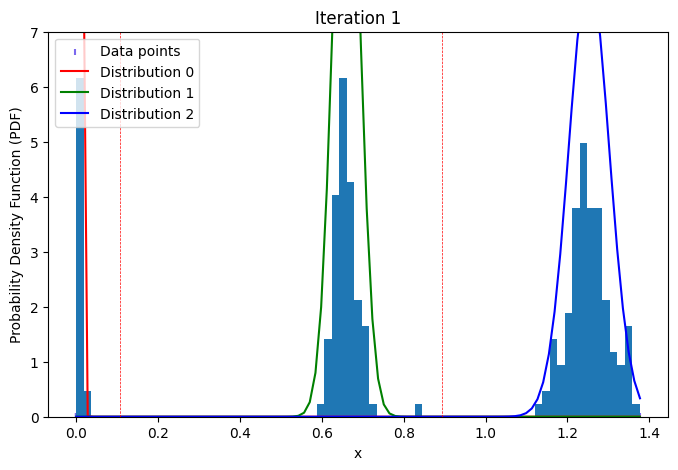

In [5]:
# Comparing two thresholds
gauss.PlotGMM(X,em,10,t,7)
gauss.PlotGMM(X,em2,10,t2,7)

In [6]:
print('Without constraint:',em[-1],t)
print('With constraint:',em2[-1],t2)

Without constraint: [{'Mean': 0.0026031759405914555, 'Variance': 3.631934372436482e-05, 'Weight': 0.12173913043478433}, {'Mean': 0.6598742205296836, 'Variance': 0.0010415399600778716, 'Weight': 0.3739130434752886}, {'Mean': 1.2526026193664808, 'Variance': 0.002445207052663402, 'Weight': 0.504347826089927}] [0.10619147769492614, 0.894292360683069]
With constraint: [{'Mean': 0.002603175940582968, 'Variance': 3.6319343719344635e-05, 'Weight': 0.12173913043478261}, {'Mean': 0.6598742205284993, 'Variance': 0.001041539959875519, 'Weight': 0.3739130434727865}, {'Mean': 1.2526026193644157, 'Variance': 0.0024452070535100775, 'Weight': 0.5043478260924309}] [0.10619147769714204, 0.8942923606439792]


[ 2.84307792e+00 -2.07944039e+01 -1.04677717e+02 -1.04725301e+02
 -1.00213688e+02 -9.53421720e+01 -9.05363606e+01 -8.58481981e+01
 -8.12826038e+01 -7.68400678e+01 -7.25206432e+01 -6.83243361e+01
 -6.42511474e+01 -6.03010772e+01 -5.64741256e+01 -5.27702925e+01
 -4.91895779e+01 -4.57319819e+01 -4.23975044e+01 -3.91861455e+01
 -3.60979051e+01 -3.31327832e+01 -3.02907799e+01 -2.75718951e+01
 -2.49761288e+01 -2.25034811e+01 -2.01539519e+01 -1.79275412e+01
 -1.58242491e+01 -1.38440755e+01 -1.19870205e+01 -1.02530840e+01
 -8.64226599e+00 -7.15456656e+00 -5.78998566e+00 -4.54852330e+00
 -3.43017947e+00 -2.43495418e+00 -1.56284743e+00 -8.13859215e-01
 -1.87989537e-01  3.14761605e-01  6.94394211e-01  9.50908279e-01
  1.08430381e+00  1.09458081e+00  9.81739264e-01  7.45779186e-01
  3.86700572e-01 -9.54965755e-02 -7.00812241e-01 -1.42924632e+00
 -2.28079809e+00 -3.25546194e+00 -4.35319060e+00 -5.57354984e+00
 -6.91219793e+00 -8.32328119e+00 -9.41805337e+00 -9.33470379e+00
 -8.62544623e+00 -7.86293

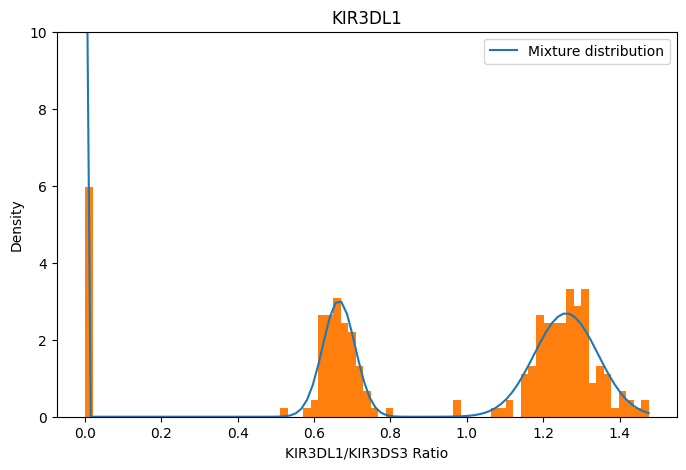

In [89]:
X=KIR3DL1
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]
print(log_prob1)
# plt.plot(b,pdf1)
plt.plot(b,pdf1,label='Mixture distribution')
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("KIR3DL1/KIR3DS3 Ratio")
plt.ylabel("Density")
plt.ylim(0,10)
plt.title('KIR3DL1')
plt.legend()
plt.show()

In [23]:
X=kir2ds3.reshape(-1,1)

N = np.arange(1,5)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)

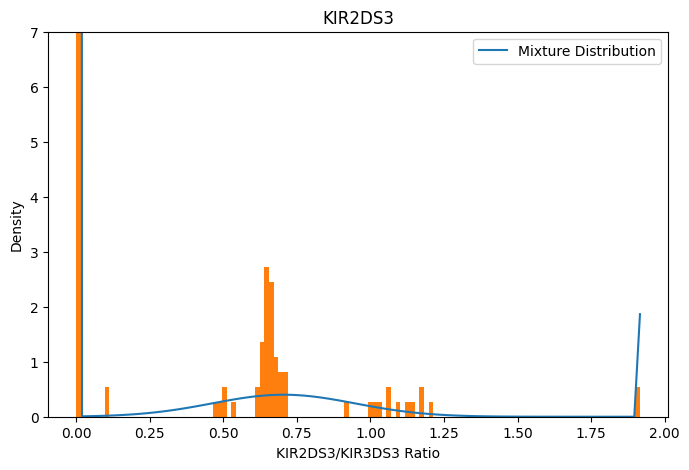

In [24]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1,label='Mixture Distribution')
# plt.plot(b,pdf_individual)
plt.hist(X,bins=120, density=True)

plt.xlabel("KIR2DS3/KIR3DS3 Ratio")
plt.ylabel("Density")
plt.ylim(0,7)
plt.title('KIR2DS3')
plt.legend()

plt.show()

### KIR3DL1

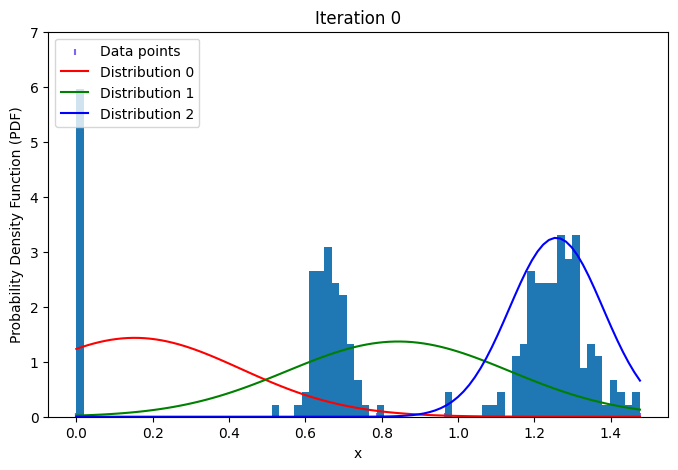

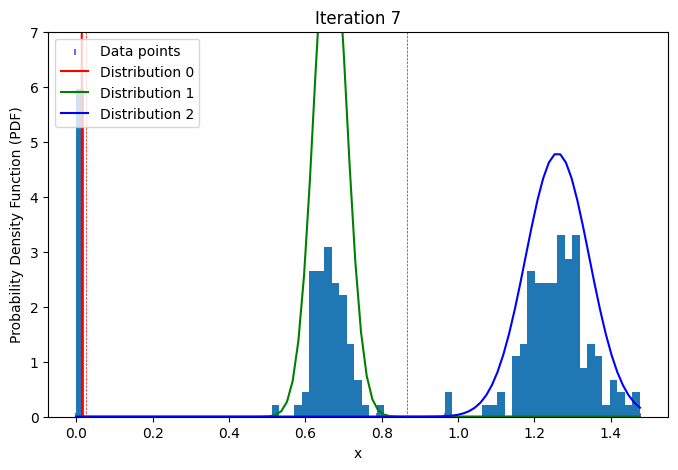

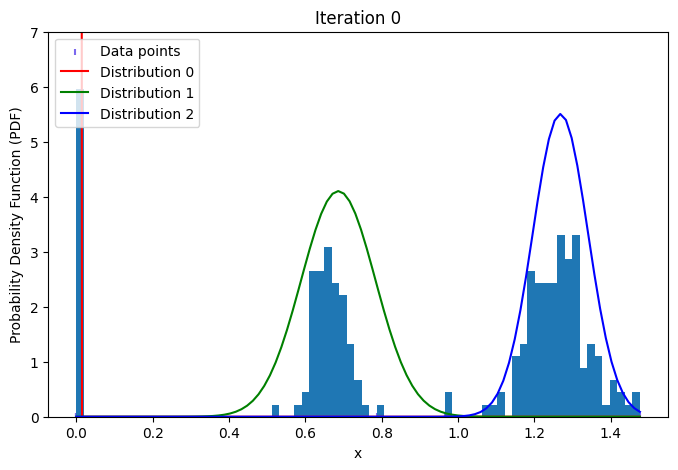

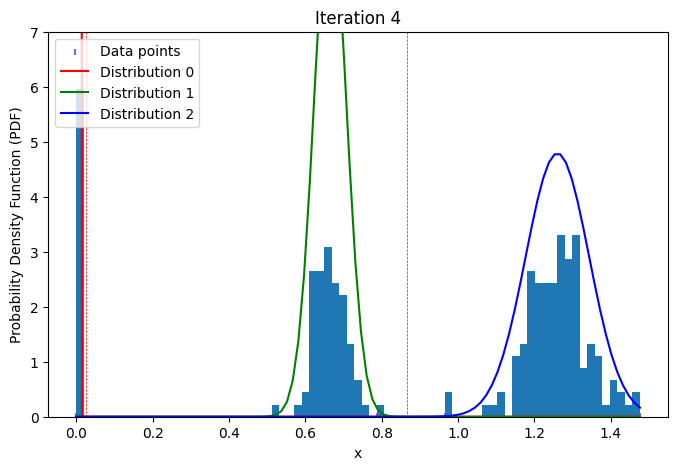

In [9]:
KIR3DL1_data=B['KIR3DL1'].to_numpy()

em,t=EMGMM(KIR3DL1_data,[])
em2,t2=EMGMM2(KIR3DL1_data,[])

gauss.PlotGMM(KIR3DL1_data,em,10,t,7)
gauss.PlotGMM(KIR3DL1_data,em2,10,t2,7)

In [10]:
print('Without constraint:',em[-1],t)
print('With constraint:',em2[-1],t2)

Without constraint: [{'Mean': 0.001608796751460074, 'Variance': 2.689379381031728e-06, 'Weight': 0.11739130434782609}, {'Mean': 0.6648761364597296, 'Variance': 0.0018053847813292564, 'Weight': 0.3217390989581064}, {'Mean': 1.2600990671879115, 'Variance': 0.006934427285030243, 'Weight': 0.5608695966940674}] [0.02649180055182432, 0.8666714906607422]
With constraint: [{'Mean': 0.001608796751460074, 'Variance': 2.689379381031728e-06, 'Weight': 0.11739130434782609}, {'Mean': 0.6648761364588862, 'Variance': 0.0018053847812361471, 'Weight': 0.3217390989559131}, {'Mean': 1.2600990671860677, 'Variance': 0.006934427285873001, 'Weight': 0.5608695966962608}] [0.02649180055239727, 0.866671490648511]


### KIR2DS3

In [72]:
KIR2DS3_data=B["KIR2DS3"].to_numpy()

In [12]:
gauss.BIC_gmm(KIR2DS3_data)

3

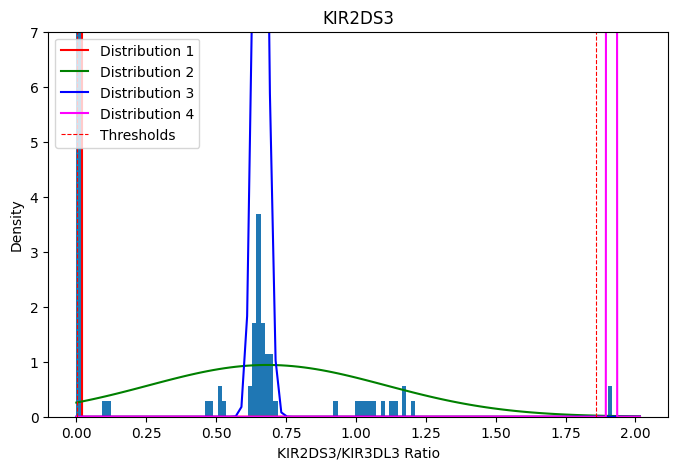

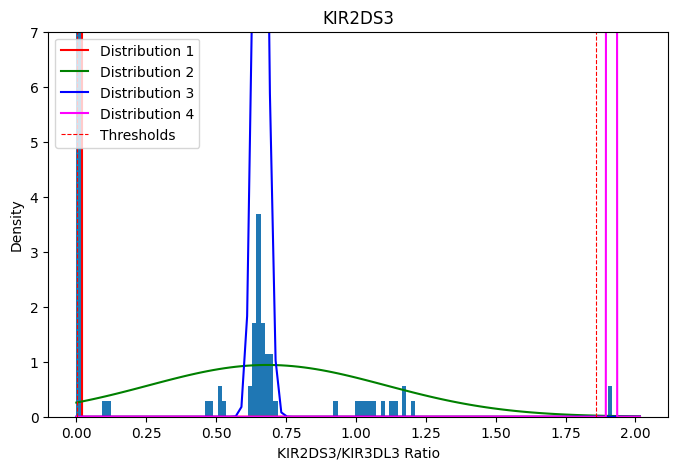

In [73]:
em=gauss.GaussianEM(KIR2DS3_data,4,[])
t2=gauss.findThreshold2(em)

PlotGMM(KIR2DS3_data,em,10,t2,'KIR2DS3',7,[],[])

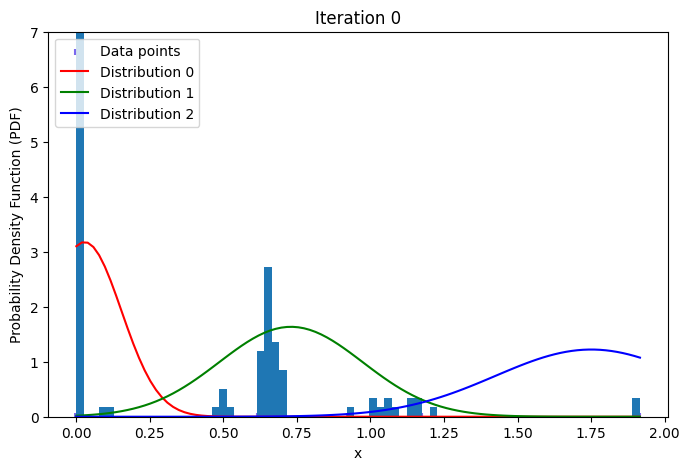

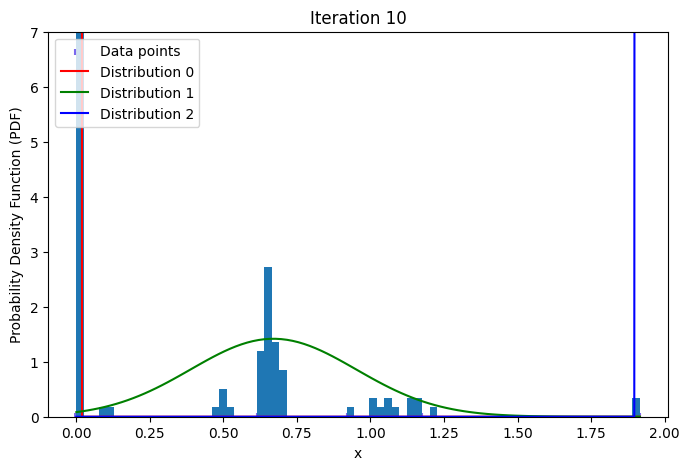

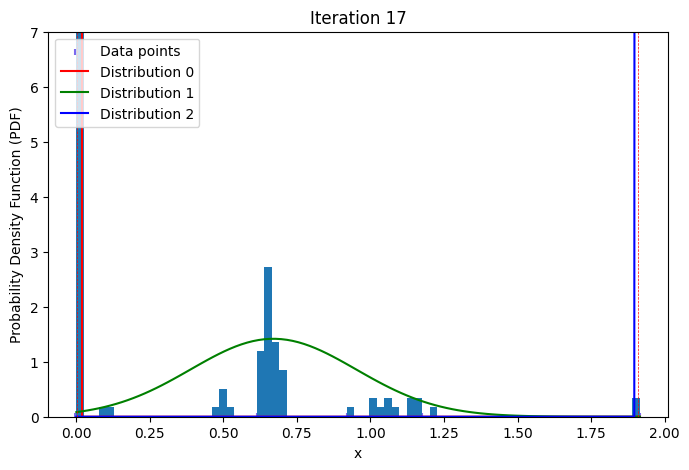

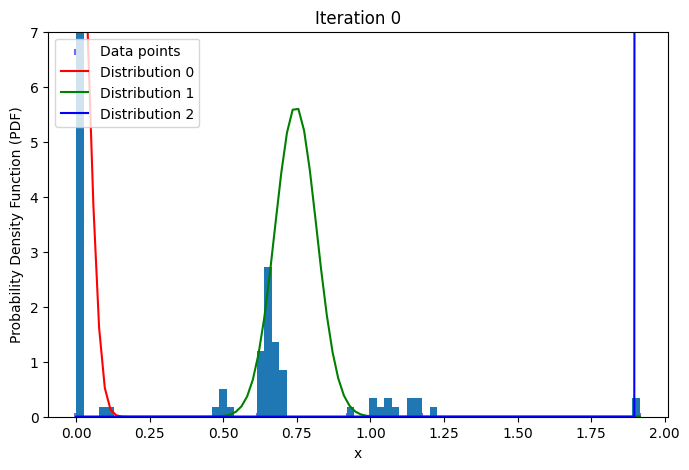

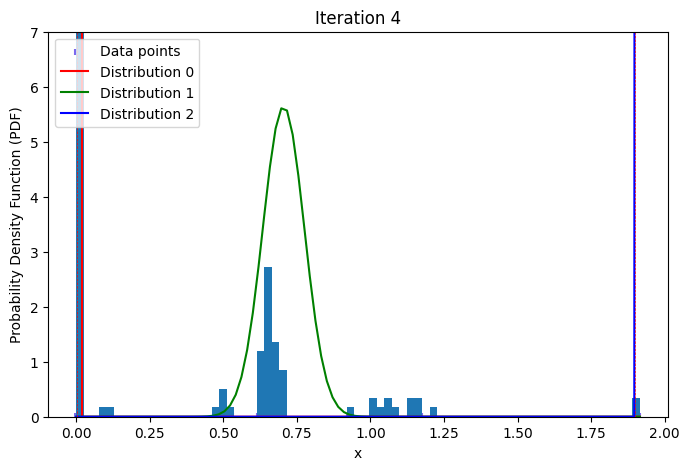

In [15]:

em,t=EMGMM(KIR2DS3_data,[])
em2,t2=EMGMM2(KIR2DS3_data,[])

gauss.PlotGMM(KIR2DS3_data,em,10,t,7)
gauss.PlotGMM(KIR2DS3_data,em2,10,t2,7)

In [27]:
print(t,t2)

[0.0012009363980548082, 1.0177096342016705, 1.9025392450569256] [0.0024133206000476605, 0.867123805078503, 1.9046713408050215]


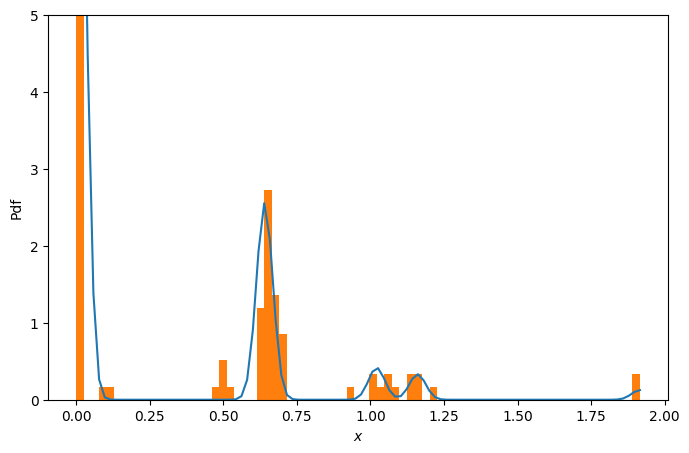

In [15]:
X=KIR2DS3_data.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 6)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i],covariance_type='tied').fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
plt.ylim(0,5)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

In [21]:
print(M_best_BIC.means_)
print(M_best_BIC.covariances_)

[[1.48877488e-03]
 [6.40275776e-01]
 [1.16006729e+00]
 [1.91535409e+00]
 [1.02094739e+00]]
[[0.00077399]]
